Mean 124660.48446512519
std 56387.16566469951
skew -0.11014547214986718
kurtosis -1.591926785005042


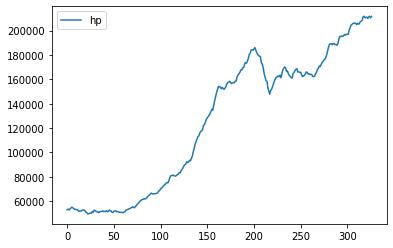

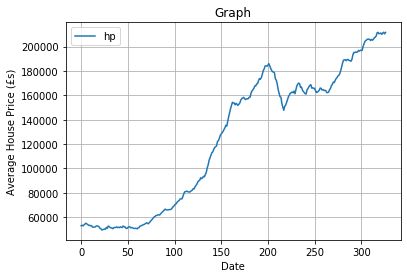

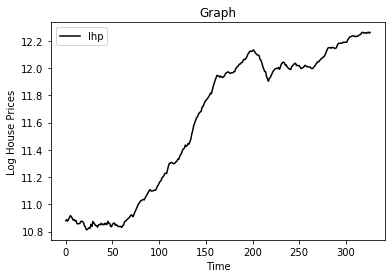

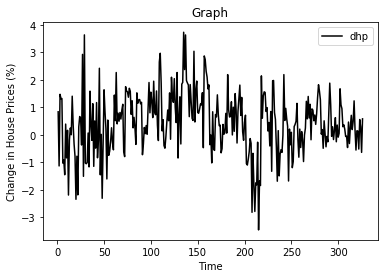

         acf      pacf            Q          p-val
0   0.994414  0.997464   326.332349   6.048114e-73
1   0.988712 -0.027281   649.925717  7.420340e-142
2   0.982618 -0.082089   970.528886  4.448579e-210
3   0.976495 -0.007150  1288.129174  1.247117e-277
4   0.970371  0.001418  1602.732686   0.000000e+00
5   0.964195 -0.014940  1914.311745   0.000000e+00
6   0.957821 -0.045080  2222.745665   0.000000e+00
7   0.951289 -0.033960  2527.941114   0.000000e+00
8   0.944489 -0.052801  2829.734747   0.000000e+00
9   0.937594 -0.018095  3128.076463   0.000000e+00
10  0.930592 -0.019314  3422.909145   0.000000e+00
11  0.923460 -0.029279  3714.161144   0.000000e+00


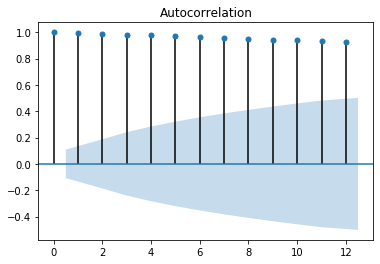

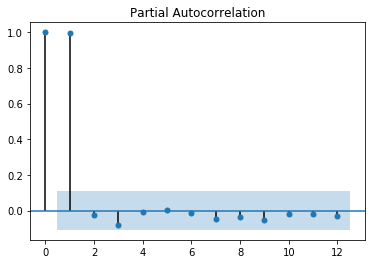

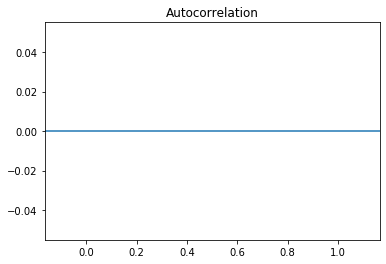

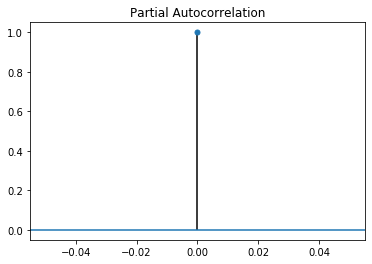

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
# Seminar Applications: basic routines of time series 

import pandas as pd

# Housing prices data: data file UKHP.xls
data=pd.read_excel('D:/ACADEMIC/TEACHING/2021/University of Westminster/Predictive Analysis/PythonCodes/UKHP.xls')

data.head()  # the data has only one variable

# Descriptive Statistics

print('Mean',data['Average House Price'].mean())
print('std',data['Average House Price'].std())
print('skew',data['Average House Price'].skew())
print('kurtosis',data['Average House Price'].kurtosis())



# Plotting the data
import matplotlib.pyplot as plt

# Basic Time Series Plot

plt.figure(1)
plt.plot(data['Average House Price'], label='hp')
plt.legend()
plt.show()


# Adding labels

plt.figure(1)
plt.plot(data['Average House Price'], label='hp')
plt.xlabel('Date')
plt.ylabel('Average House Price (£s)')
plt.title('Graph')
plt.grid(True)
plt.legend()
plt.show()


# Taking the log
import numpy as np
data['lhp']=np.log(data['Average House Price'])  # this line generates the log of prices

# Plotting the log prices

plt.figure(1)
plt.plot(data['lhp'], label='lhp', color='black')
plt.xlabel('Time')
plt.ylabel('Log House Prices')
plt.title('Graph')
plt.grid(False)  # note the change here. I removed the grid lines
plt.legend()
plt.show()

# generating the first difference of the data
# here we write a short code to generate the first difference


def LogDiff(x):
        x_diff=100*np.log(x/x.shift(1))  # note here: you do not need to multiply by 100
        return x_diff

# generating the fist difference of prices

data['dhp']=LogDiff(data['Average House Price'])

# plotting the first difference
plt.figure(1)
plt.plot(data['dhp'], label='dhp', color='black')
plt.xlabel('Time')
plt.ylabel('Change in House Prices (%)')
plt.title('Graph')
plt.grid(False)  # note the change here. I removed the grid lines
plt.legend()
plt.show()


# The Correlogram of log house prices
import statsmodels.tsa.api as smt


acf,q,pval=smt.acf(data['lhp'], nlags=12, qstat=True)
pacf = smt.pacf(data['lhp'],nlags=12)

correlogram=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(correlogram)

# Plotting the correlograms 
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(data["lhp"].values.squeeze(), lags=12) # The ACF
plt.show()

sm.graphics.tsa.plot_pacf(data["lhp"].values.squeeze(), lags=12) # The PACF
plt.show()


# The Correlogram of change in house prices
import statsmodels.tsa.api as smt


acf,q,pval=smt.acf(data['dhp'], nlags=12, qstat=True)
pacf = smt.pacf(data['dhp'],nlags=12)

correlogram1=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
correlogram1

# Plotting the correlograms 
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(data["dhp"].values.squeeze(), lags=12) # The ACF
plt.show()

sm.graphics.tsa.plot_pacf(data["dhp"].values.squeeze(), lags=12) # The PACF
plt.show()


